In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [6]:
df2=pd.read_excel('./data_decision_tree.xlsx')
df2

,Sức khỏe,Thời tiết,Kết quả
0,ốm,u ám,nghỉ
1,ốm,mưa,nghỉ
2,ốm,nắng,nghỉ
3,ốm,u ám,học
4,tốt,u ám,học
5,tốt,mưa,học
6,tốt,nắng,nghỉ


In [2]:
df= pd.read_csv('./drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.describe()   

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [6]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [7]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.rename(columns={'Na_to_K':'Sodium_to_Potassium','BP':'Blood_Pressure'},inplace=True)
df['Sex'].replace({'M':'Male','F':'Female'},inplace=True)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].round(0)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].astype(int)
                   


C:\Users\LOAN\AppData\Local\Temp\ipykernel_12592\2277298035.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace({'M':'Male','F':'Female'},inplace=True)


In [11]:
df

,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Drug
0,23,Female,HIGH,HIGH,25,drugY
1,47,Male,LOW,HIGH,13,drugC
2,47,Male,LOW,HIGH,10,drugC
3,28,Female,NORMAL,HIGH,8,drugX
4,61,Female,LOW,HIGH,18,drugY
...,...,...,...,...,...,...
195,56,Female,LOW,HIGH,12,drugC
196,16,Male,LOW,HIGH,12,drugC
197,52,Male,NORMAL,HIGH,10,drugX
198,23,Male,NORMAL,NORMAL,14,drugX


In [12]:
# Thống kê số lượng người thuộc 5 nhóm tuổi cao nhất
age_values = df['Age'].value_counts()
top_age=age_values.head(5)
df_top_age = pd.DataFrame({'Age':top_age.index, 'Count':top_age.values})

df_top_age

,Age,Count
0,47,8
1,23,7
2,28,7
3,49,7
4,32,6


Columns in df: Index(['Age', 'Sex', 'Blood_Pressure', 'Cholesterol', 'Sodium_to_Potassium',
       'Drug'],
      dtype='object')
Columns in df_top_age: Index(['Age', 'Count'], dtype='object')


C:\Users\LOAN\AppData\Local\Temp\ipykernel_12592\1701837784.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, ax=aX, palette=palette)
C:\Users\LOAN\AppData\Local\Temp\ipykernel_12592\1701837784.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, ax=aX, palette=palette)
C:\Users\LOAN\AppData\Local\Temp\ipykernel_12592\1701837784.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, ax=aX, palette=palette)
C:\Users\LOAN\AppData\Local\Temp\ipykernel_12592\1701837784.py:11: FutureWarning: 

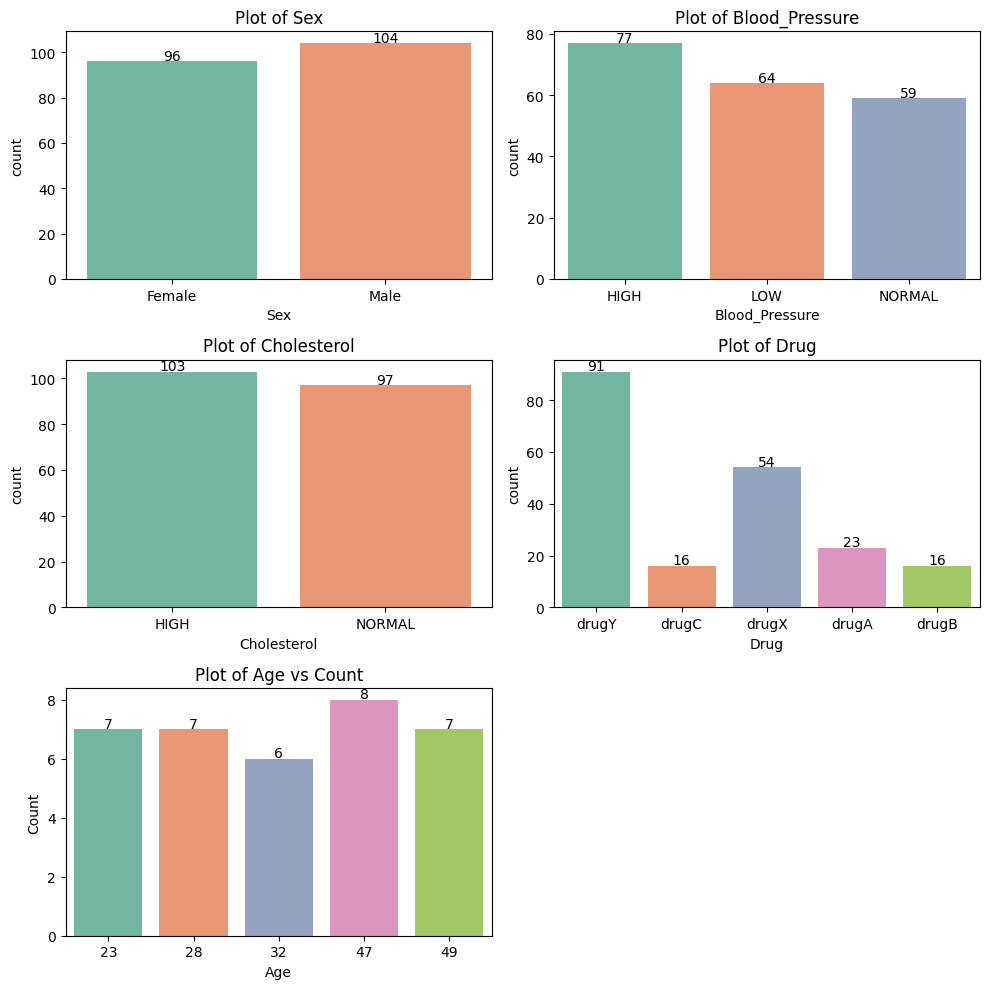

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_plot(aX, x, data, plot_type='count', y=None, palette='Set2'):
    if x not in data.columns:
        raise ValueError(f"Column '{x}' does not exist in the DataFrame")
    if plot_type == 'bar' and y not in data.columns:
        raise ValueError(f"Column '{y}' does not exist in the DataFrame")

    if plot_type == 'count':
        sns.countplot(x=x, data=data, ax=aX, palette=palette)
    elif plot_type == 'bar':
        sns.barplot(x=x, y=y, data=data, ax=aX, palette=palette)

    aX.set_title(f'Plot of {x}' if plot_type == 'count' else f'Plot of {x} vs {y}')

    if aX.patches:
        for p in aX.patches:
            aX.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='baseline',
                        fontsize=10, color='black', 
                        xytext=(0, 1),
                        textcoords='offset points')

# Check if the DataFrame contains the required columns
print("Columns in df:", df.columns)
print("Columns in df_top_age:", df_top_age.columns)

# Khởi tạo figure
plt.figure(figsize=(10, 10))

# Cấu hình các biểu đồ
plot_configs = [
    {'x': 'Sex', 'data': df, 'plot_type': 'count'},
    {'x': 'Blood_Pressure', 'data': df, 'plot_type': 'count'},
    {'x': 'Cholesterol', 'data': df, 'plot_type': 'count'},
    {'x': 'Drug', 'data': df, 'plot_type': 'count'},
    {'x': 'Age', 'y': 'Count', 'data': df_top_age, 'plot_type': 'bar'}
]

# Vẽ các subplot
for i, config in enumerate(plot_configs):
    ax = plt.subplot(3, 2, i + 1)
    create_plot(ax, **config)

plt.tight_layout()
plt.show()

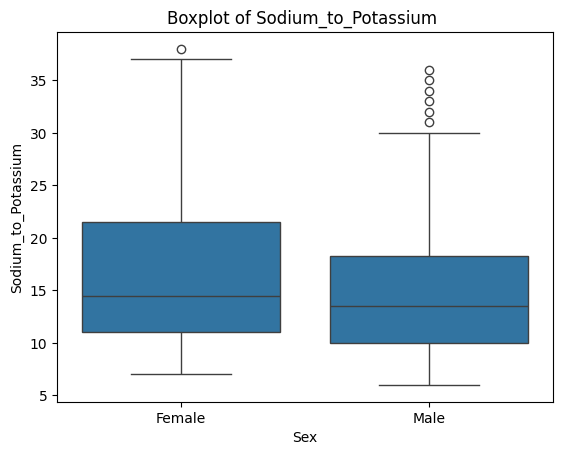

In [38]:
plt.Figure(figsize=(5,5))
sns.boxplot(x='Sex',y='Sodium_to_Potassium',data=df)
plt.title('Boxplot of Sodium_to_Potassium ')
plt.show()

In [49]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x

,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium
0,23,Female,HIGH,HIGH,25
1,47,Male,LOW,HIGH,13
2,47,Male,LOW,HIGH,10
3,28,Female,NORMAL,HIGH,8
4,61,Female,LOW,HIGH,18
...,...,...,...,...,...
195,56,Female,LOW,HIGH,12
196,16,Male,LOW,HIGH,12
197,52,Male,NORMAL,HIGH,10
198,23,Male,NORMAL,NORMAL,14


In [50]:
#OneHotEncoder 
onehot_encoder_sex = OneHotEncoder(sparse_output=False) 
one_hot_encoded = onehot_encoder_sex.fit_transform(x[['Sex']]) 
one_hot_df= pd.DataFrame(one_hot_encoded, columns=onehot_encoder_sex.get_feature_names_out(['Sex'])) 
x= pd.concat([x, one_hot_df], axis=1) 

x=x.drop('Sex', axis=1) # Drop the original categorical columns 
# Labelled encoder 
labelled_encoder_blood_pressure= LabelEncoder() 
labelled_encoder_cholesterol= LabelEncoder() 
x['Blood_Pressure'] = labelled_encoder_blood_pressure.fit_transform(x['Blood_Pressure']) 
x['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(x['Cholesterol']) 
x

,Age,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Sex_Female,Sex_Male
0,23,0,0,25,1.0,0.0
1,47,1,0,13,0.0,1.0
2,47,1,0,10,0.0,1.0
3,28,2,0,8,1.0,0.0
4,61,1,0,18,1.0,0.0
...,...,...,...,...,...,...
195,56,1,0,12,1.0,0.0
196,16,1,0,12,0.0,1.0
197,52,2,0,10,0.0,1.0
198,23,2,1,14,0.0,1.0


In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [52]:
X_train

,Age,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Sex_Female,Sex_Male
2,47,1,0,10,0.0,1.0
77,26,0,1,19,1.0,0.0
46,37,0,0,13,1.0,0.0
187,47,0,0,10,0.0,1.0
191,23,0,0,8,0.0,1.0
...,...,...,...,...,...,...
106,22,2,0,12,0.0,1.0
14,50,2,0,13,1.0,0.0
92,29,0,0,29,1.0,0.0
179,67,2,0,16,1.0,0.0


In [53]:
X_test

,Age,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Sex_Female,Sex_Male
95,36,1,1,11,0.0,1.0
15,16,0,1,16,1.0,0.0
30,18,2,1,9,1.0,0.0
158,59,1,0,10,1.0,0.0
128,47,1,1,34,0.0,1.0
...,...,...,...,...,...,...
113,65,1,1,14,1.0,0.0
26,31,0,0,30,0.0,1.0
139,69,2,0,10,1.0,0.0
100,31,0,1,12,0.0,1.0


In [54]:
dtc=DecisionTreeClassifier(criterion="entropy", max_depth=6,max_leaf_nodes=10)

In [55]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)

In [56]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)

In [57]:
dtc.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object)

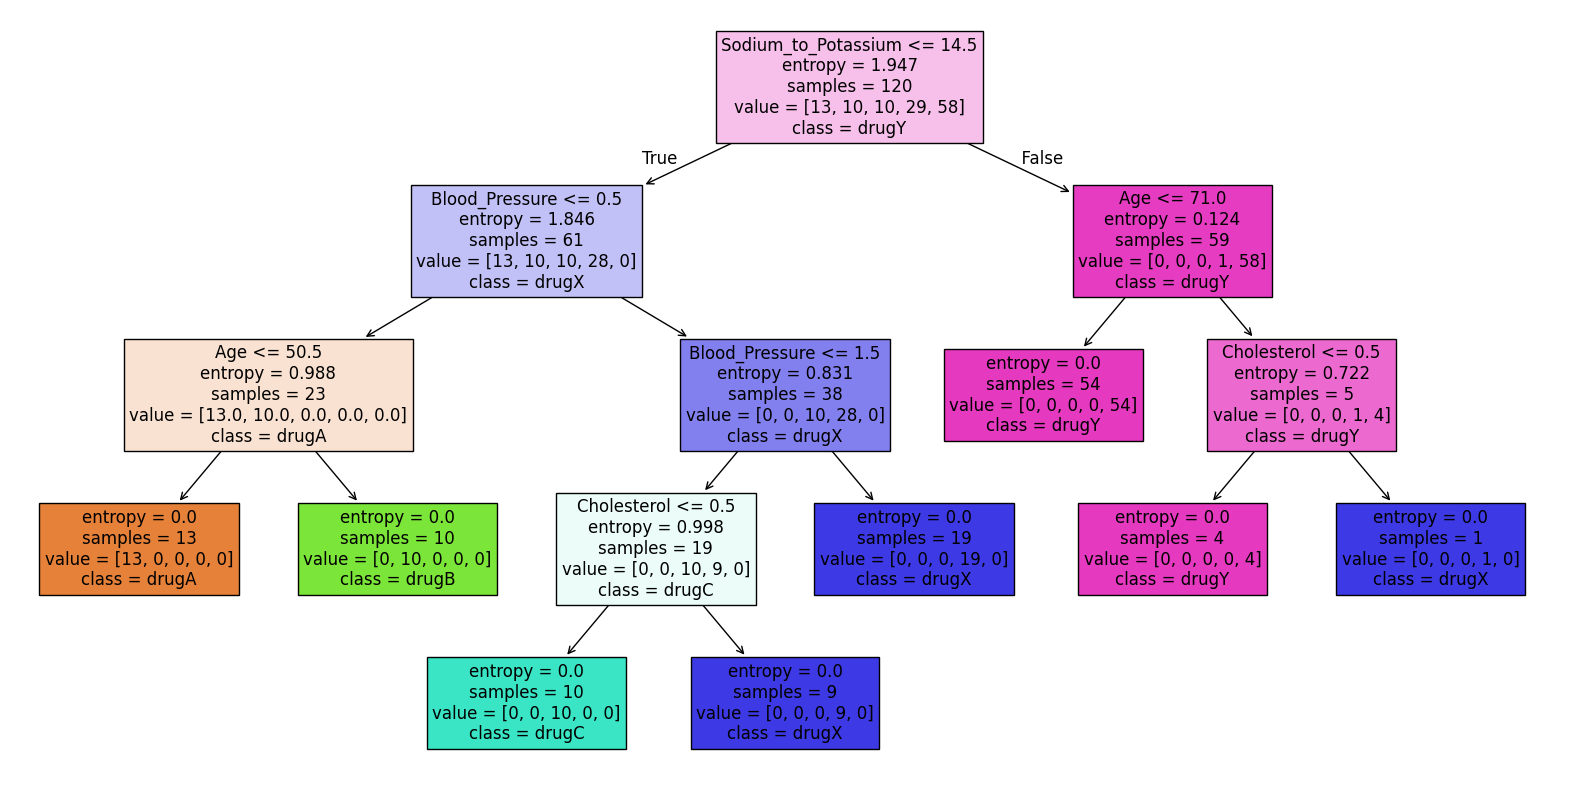

In [59]:
from sklearn.tree import plot_tree

feature_cols= X_train.columns

plt.figure(figsize=(20,10))
plot_tree(dtc, class_names=dtc.classes_,feature_names=feature_cols,fontsize=12,filled=True)
plt.show()

In [61]:
y_test_pred=dtc.predict(X_test)

print("Accurancy:",100*metrics.accuracy_score(y_test,y_test_pred))

Accurancy: 98.75


In [62]:
from sklearn.metrics import confusion_matrix
cf_matrix= confusion_matrix(y_test, y_test_pred)
cf_matrix

array([[10,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 25,  0],
       [ 0,  0,  0,  1, 32]])

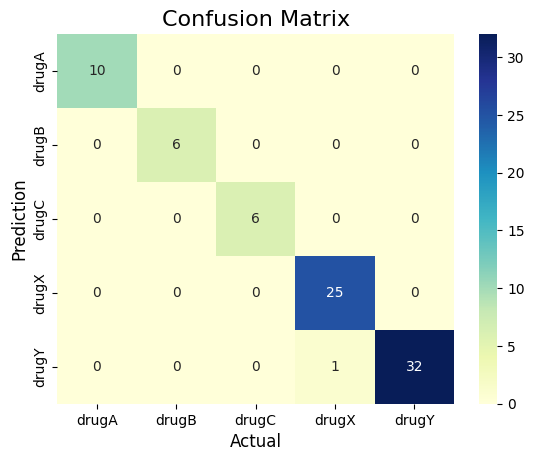

In [64]:
sns.heatmap(cf_matrix,annot=True,fmt='d', cmap='YlGnBu',xticklabels=dtc.classes_,yticklabels=dtc.classes_)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [67]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,fbeta_score

accuracy=accuracy_score(y_test,y_test_pred)
print(accuracy)

precision= precision_score(y_test,y_test_pred,average=None)
print(precision)
recall=recall_score(y_test,y_test_pred,average=None)
print(recall)

f1= f1_score(y_test,y_test_pred,average=None)
print(f1)
f0_5=fbeta_score(y_test,y_test_pred,beta=0.5,average=None)
print(f0_5)
f2=fbeta_score(y_test,y_test_pred,beta=2,average=None)
print(f2)

0.9875
[1.         1.         1.         0.96153846 1.        ]
[1.         1.         1.         1.         0.96969697]
[1.         1.         1.         0.98039216 0.98461538]
[1.         1.         1.         0.96899225 0.99378882]
[1.         1.         1.         0.99206349 0.97560976]


In [68]:
micro_precision=precision_score(y_test,y_test_pred,average='micro')
print(micro_precision)

0.9875


In [69]:
macro_precision= precision_score(y_test,y_test_pred,average='macro')
print(macro_precision)

0.9923076923076923


In [70]:
from sklearn.metrics import classification_report
target_names=['drugA','drugB','drugC','drugX','drugY']
print(classification_report(y_test,y_test_pred,target_names=target_names))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         6
       drugX       0.96      1.00      0.98        25
       drugY       1.00      0.97      0.98        33

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [72]:
age = 32 
blood= 'HIGH' 
blood_scaled= labelled_encoder_blood_pressure.transform([blood]) 
cholesterol = 'NORMAL' 
cholesterol_scaled= labelled_encoder_cholesterol.transform([cholesterol]) 
Sodium_to_Potassium = 13 
sex = 'Female' 
sex_scaled= onehot_encoder_sex.transform([[sex]]) 
sex_scaled= sex_scaled.flatten() 
feature_sample = np.array([age, blood_scaled[0], cholesterol_scaled[0],Sodium_to_Potassium, sex_scaled[0], sex_scaled[1]])

y_sample_pred = dtc.predict([feature_sample])
y_sample_pred

c:\Users\LOAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\LOAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['drugA'], dtype=object)

In [ ]:
# Hãy tính IG của Root sau khi được phân tách thành left và right. Làm tròn 5 chữ số thập phân